# Hazard: Tropical cyclones

Tropical cyclones tracks are gathered in the class `TCTracks` and then provided to the hazard `TropCyclone` which computes the wind gusts at each centroid. `TropCyclone` inherits from `Hazard` and has an associated hazard type `TC`.

# TCTracks class

`TCTracks` reads and handles historical tropical cyclone tracks of the [IBTrACS](https://www.ncdc.noaa.gov/ibtracs/) repository. It also generates synthetic tracks from the historical ones using Wiener processes.

The tracks are stored in the attribute `data`, which is a list of `xarray`'s `Dataset` (see [xarray.Dataset](http://xarray.pydata.org/en/stable/generated/xarray.Dataset.html)). Each `Dataset` contains the following variables:

    - time (coords)
    - lat (coords)
    - lon (coords)
    - time_step
    - radius_max_wind
    - max_sustained_wind
    - central_pressure
    - environmental_pressure
    - max_sustained_wind_unit (attrs)
    - central_pressure_unit (attrs)
    - sid (attrs)
    - name (attrs)
    - orig_event_flag (attrs)
    - data_provider (attrs)
    - basin (attrs)
    - id_no (attrs)
    - category (attrs)


## HISTORICAL EVENTS

The method `read_ibtracs_netcdf()` generates the `Datasets` for tracks selected by [IBTrACS](https://www.ncdc.noaa.gov/ibtracs/) id, or by basin and year range. To achieve this, it downloads the first time the [IBTrACS data v4 in netcdf format](ftp://eclipse.ncdc.noaa.gov/pub/ibtracs//v04r00/provisional/netcdf/IBTrACS.ALL.v04r00.nc) and stores it in `climada_python/data/system`. The tracks can be accessed later either using the attribute `data` or using `get_track()`, which allows to select tracks by its name or id. Use the method `append()` to extend the `data` list.

If you get an error downloading the IBTrACS data, try to manually access [ftp://eclipse.ncdc.noaa.gov/pub/ibtracs//v04r00/provisional/netcdf/](ftp://eclipse.ncdc.noaa.gov/pub/ibtracs//v04r00/provisional/netcdf/), connect as a *Guest* and copy the file `IBTrACS.ALL.v04r00.nc` to `climada_python/data/system`.

To visualize the tracks use `plot()`.


2019-10-29 20:55:17,260 - climada - DEBUG - Loading default config file: /Users/aznarsig/Documents/Python/climada_python/climada/conf/defaults.conf
2019-10-29 20:55:22,577 - climada.hazard.tc_tracks - INFO - Reading 2017242N16333: IRMA


/Users/aznarsig/Documents/Python/climada_python/climada/util/plot.py:318: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


2019-10-29 20:55:27,156 - climada.hazard.tc_tracks - INFO - Reading 1993162N10245: ADRIAN
2019-10-29 20:55:27,318 - climada.hazard.tc_tracks - INFO - Reading 1993169N13265: BEATRIZ
2019-10-29 20:55:27,464 - climada.hazard.tc_tracks - INFO - Reading 1993178N14265: NOT_NAMED
2019-10-29 20:55:27,604 - climada.hazard.tc_tracks - WARNING - Skipping 1993178N14265. No usable data.
2019-10-29 20:55:27,673 - climada.hazard.tc_tracks - INFO - Reading 1993186N13262: CALVIN
2019-10-29 20:55:27,839 - climada.hazard.tc_tracks - INFO - Reading 1993196N11241: DORA
2019-10-29 20:55:28,003 - climada.hazard.tc_tracks - INFO - Reading 1993197N11247: EUGENE
2019-10-29 20:55:28,149 - climada.hazard.tc_tracks - INFO - Reading 1993221N12216: KEONI
2019-10-29 20:55:28,293 - climada.hazard.tc_tracks - WARNING - Skipping 1993221N12216. No usable data.
2019-10-29 20:55:28,295 - climada.hazard.tc_tracks - INFO - Reading 1993221N13256: FERNANDA
2019-10-29 20:55:28,438 - climada.hazard.tc_tracks - INFO - Reading 199

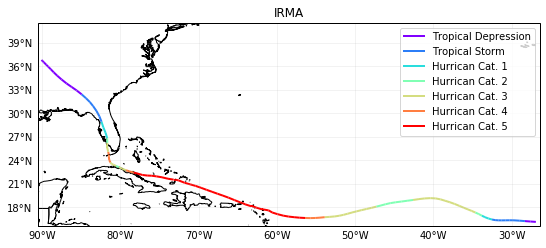

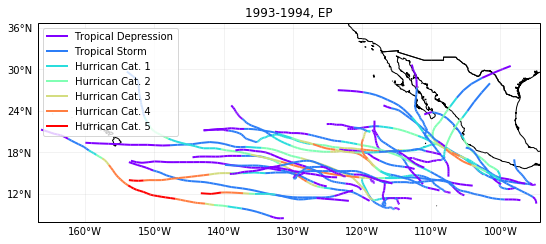

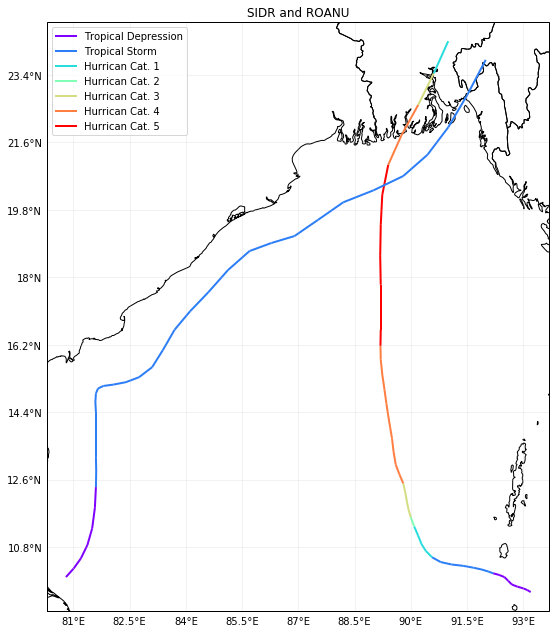

In [1]:
%matplotlib inline
from climada.hazard import TCTracks

tr_irma = TCTracks()
tr_irma.read_ibtracs_netcdf(provider='usa', storm_id='2017242N16333') # IRMA 2017
ax = tr_irma.plot()
ax.set_title('IRMA') # set title

# other ibtracs selection options
from climada.hazard import TCTracks
sel_ibtracs = TCTracks()
# years 1993 and 1994 in basin EP. 
# correct_pres ignores tracks with not enough data. For statistics (frequency of events), these should be considered as well
sel_ibtracs.read_ibtracs_netcdf(provider='usa', year_range=(1993, 1994), basin='EP', correct_pres=False)
print('Number of tracks:', sel_ibtracs.size)
ax = sel_ibtracs.plot()
ax.get_legend()._loc = 2 # correct legend location
ax.set_title('1993-1994, EP') # set title

track1 = TCTracks()
track1.read_ibtracs_netcdf(provider='usa', storm_id='2007314N10093') # SIDR 2007
track2 = TCTracks()
track2.read_ibtracs_netcdf(provider='usa', storm_id='2016138N10081') # ROANU 2016
track1.append(track2.data) # put both tracks together
ax = track1.plot()
ax.get_legend()._loc = 2 # correct legend location
ax.set_title('SIDR and ROANU'); # set title

In [2]:
tr_irma.get_track('2017242N16333')

<xarray.Dataset>
Dimensions:                 (time: 123)
Coordinates:
  * time                    (time) datetime64[ns] 2017-08-30 ... 2017-09-13T12:00:00
    lat                     (time) float32 16.1 16.147842 ... 36.495224 36.8
    lon                     (time) float32 -26.9 -27.592503 ... -89.794334 -90.1
Data variables:
    radius_max_wind         (time) float64 60.0 60.0 60.0 ... 60.0 60.0 60.0
    max_sustained_wind      (time) float64 30.0 32.0 35.0 ... 15.0 15.0 15.0
    central_pressure        (time) float64 1.008e+03 1.007e+03 ... 1.005e+03
    environmental_pressure  (time) float64 1.012e+03 1.012e+03 ... 1.008e+03
    time_step               (time) float64 3.0 3.0 3.0 3.0 ... 3.0 3.0 3.0 3.0
Attributes:
    max_sustained_wind_unit:  kn
    central_pressure_unit:    mb
    name:                     IRMA
    sid:                      2017242N16333
    orig_event_flag:          True
    data_provider:            usa
    basin:                    NA
    id_no:               

## PROBABILISTIC EVENTS

Once tracks are present in `TCTracks`, one can generate synthetic tracks for each present track using `calc_random_walk()` and interpolate all the tracks to the same timestep using `equal_timestep()`.

`calc_random_walk()` generates random tracks within a configurable angle of variation. The wind intensities are decayed after landfall following an exponential decay. The decay coefficients are computed for each category (Saffir-Simpson scale) of the historical events and applied to the corresponding synthetic tracks.

2019-10-29 20:55:44,097 - climada.hazard.tc_tracks - INFO - Computing 5 synthetic tracks.
2019-10-29 20:55:46,135 - climada.hazard.tc_tracks - DEBUG - No historical track of category Tropical Depression with landfall. Decay parameters from category Hurrican Cat. 3 taken.
2019-10-29 20:55:46,136 - climada.hazard.tc_tracks - DEBUG - No historical track of category Tropical Storm with landfall. Decay parameters from category Hurrican Cat. 3 taken.
2019-10-29 20:55:46,137 - climada.hazard.tc_tracks - DEBUG - No historical track of category Hurrican Cat. 1 with landfall. Decay parameters from category Hurrican Cat. 3 taken.
2019-10-29 20:55:46,138 - climada.hazard.tc_tracks - DEBUG - No historical track of category Hurrican Cat. 2 with landfall. Decay parameters from category Hurrican Cat. 3 taken.
2019-10-29 20:55:46,140 - climada.hazard.tc_tracks - DEBUG - No historical track of category Hurrican Cat. 4 with landfall. Decay parameters from category Hurrican Cat. 5 taken.


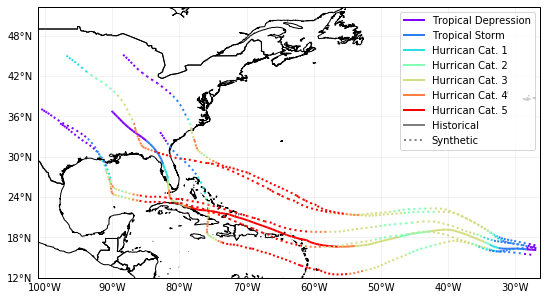

In [3]:
# select number of synthetic tracks to generate per present tracks. 
# see more configutration options (e.g. opening angle)
tr_irma.calc_random_walk(ens_size=5)
tr_irma.plot()

In [4]:
tr_irma.data[-1] # last synthetic track. notice the value of orig_event_flag and name

<xarray.Dataset>
Dimensions:                 (time: 123)
Coordinates:
  * time                    (time) datetime64[ns] 2017-08-30 ... 2017-09-13T12:00:00
    lat                     (time) float64 15.39 15.49 15.6 ... 34.59 34.79 35.0
    lon                     (time) float64 -27.64 -28.42 ... -97.51 -97.84
Data variables:
    radius_max_wind         (time) float64 60.0 60.0 60.0 ... 60.0 60.0 60.0
    max_sustained_wind      (time) float64 30.0 32.0 35.0 ... 12.01 11.31 10.58
    central_pressure        (time) float64 1.008e+03 1.007e+03 ... 999.2 999.8
    environmental_pressure  (time) float64 1.012e+03 1.012e+03 ... 1.008e+03
    time_step               (time) float64 3.0 3.0 3.0 3.0 ... 3.0 3.0 3.0 3.0
    on_land                 (time) bool False False False ... True True True
    dist_since_lf           (time) float64 nan nan nan nan ... 804.3 838.2 875.9
Attributes:
    max_sustained_wind_unit:  kn
    central_pressure_unit:    mb
    name:                     IRMA_gen5
    s

2019-10-29 20:55:48,232 - climada.hazard.tc_tracks - INFO - Interpolating 6 tracks to 1h time steps.


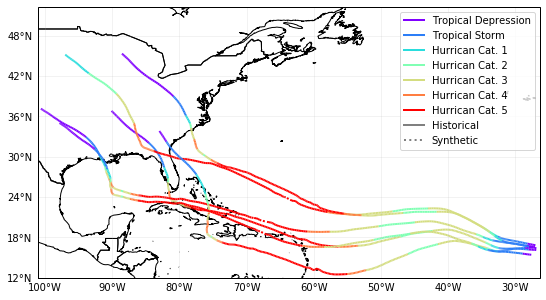

In [5]:
tr_irma.equal_timestep(time_step_h=1) # interpolate properties to 1 hour time step
tr_irma.plot()

### EXERCISE

Using the first synthetic track generated,

1. Which is the time frequency of the data?
2. Compute the maximum sustained wind for each day.

In [6]:
# Put your code here





In [7]:
# SOLUTION:
import numpy as np
# select the track
tc_syn = tr_irma.get_track('2017242N16333_gen1')

# 1. Which is the time frequency of the data?
# The values of a DataArray are numpy.arrays. 
# The nummpy.ediff1d computes the different between elements in an array
diff_time_ns = np.ediff1d(tc_syn.time)
diff_time_h = diff_time_ns.astype(int)/1000/1000/1000/60/60
print('Mean time frequency in hours:', diff_time_h.mean())
print('Std time frequency in hours:', diff_time_h.std())
print()

# 2. Compute the maximum sustained wind for each day.
print('Daily max sustained wind:', tc_syn.max_sustained_wind.groupby('time.day').max())

Mean time frequency in hours: 1.0
Std time frequency in hours: 0.0

Daily max sustained wind: <xarray.DataArray 'max_sustained_wind' (day: 15)>
array([100.      , 100.      , 100.      , 123.333333, 155.      , 155.      ,
       150.      , 144.      , 145.      , 130.291495, 113.852824,  92.890059,
        76.949128,  54.      ,  99.      ])
Coordinates:
  * day      (day) int64 1 2 3 4 5 6 7 8 9 10 11 12 13 30 31


# TropCyclone class

The `TropCyclone` class is a derived class of [Hazard](climada_hazard_Hazard.ipynb). As such, it contains all the attributes and methods of a `Hazard`. Additionally, it contains the method `set_from_tracks()` to model tropical cyclones from tracks contained in a `TCTracks` instance. 

When setting tropical cyclones from tracks, the centroids where to map the wind gusts (the hazard intensity) can be provided. If no centroids are provided, the global centroids `GLB_NatID_grid_0360as_adv_2.mat` are used. 

From the track properties the 1 min sustained peak gusts are computed in each centroid as the sum of a circular wind field (following Holland, 2008) and the translational wind speed that arises from the storm movement. We incorporate the decline of the translational component from the cyclone centre by multiplying it by an attenuation factor. See [CLIMADA v1](https://www.geosci-model-dev.net/12/3085/2019/) and references therein for more information.

2019-10-29 20:55:51,366 - climada.hazard.centroids.centr - INFO - Setting geometry points.
2019-10-29 20:55:51,489 - climada.hazard.centroids.centr - DEBUG - Setting dist_coast 3822 points.
2019-10-29 20:55:52,291 - climada.hazard.trop_cyclone - INFO - Mapping 6 tracks to 3822 centroids.
2019-10-29 20:55:56,710 - climada.hazard.trop_cyclone - DEBUG - Append events.
2019-10-29 20:55:56,724 - climada.hazard.trop_cyclone - DEBUG - Compute frequency.


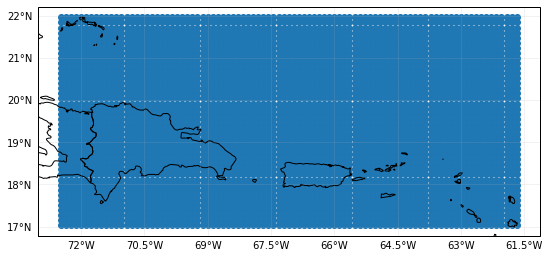

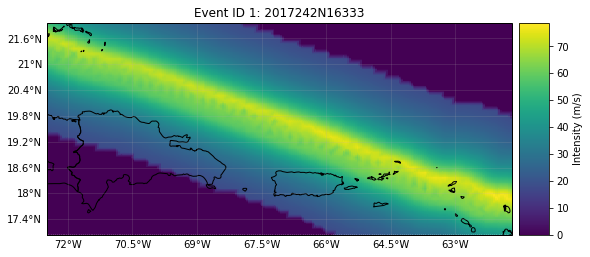

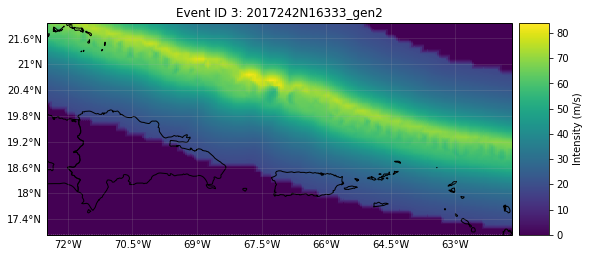

In [8]:
from climada.hazard import Centroids, TropCyclone

# construct centroids
min_lat, max_lat, min_lon, max_lon = 16.99375, 21.95625, -72.48125, -61.66875
cent = Centroids()
cent.set_raster_from_pnt_bounds((min_lon, min_lat, max_lon, max_lat), res=0.12)
cent.check()
cent.plot()

# construct tropical cyclones
tc_irma = TropCyclone()
tc_irma.set_from_tracks(tr_irma, centroids=cent)
#tc_irma.set_from_tracks(tr_irma) # try without given centroids
tc_irma.check()
tc_irma.plot_intensity('2017242N16333')      # IRMA
tc_irma.plot_intensity('2017242N16333_gen2') # IRMA's synthetic track 2

## Implementing climate change

'set_climate_scenario_knu' implements the changes on intensity and frequency due to climate change described in *Global projections of intense tropical cyclone activity for the late twenty-first century from dynamical downscaling of CMIP5/RCP4.5 scenarios* of Knutson et al 2015. Other RCP scenarios are approximated from the RCP 4.5 values by interpolating them according to their relative radiative forcing.

2019-10-29 20:55:59,741 - climada.hazard.trop_cyclone - INFO - Mapping 6 tracks to 3822 centroids.
2019-10-29 20:56:00,485 - climada.hazard.trop_cyclone - DEBUG - Append events.
2019-10-29 20:56:00,498 - climada.hazard.trop_cyclone - DEBUG - Compute frequency.


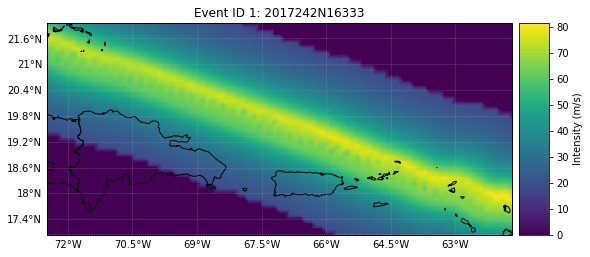

In [9]:
# an Irma event-like in 2055 under RCP 4.5:
tc_irma = TropCyclone()
tc_irma.set_from_tracks(tr_irma, centroids=cent)
tc_irma_cc = tc_irma.set_climate_scenario_knu(ref_year=2055, rcp_scenario=45)
tc_irma_cc.plot_intensity('2017242N16333')

## Multiprocessing - improving performance for big computations

Multiprocessing is implemented in the tropical cyclones. When dealing with a big amount of data, you might consider using it as follows:

In [ ]:
# execute these lines in a console, outside Jupyter Notebook

from climada.hazard import TCTracks, Centroids, TropCyclone
from pathos.pools import ProcessPool as Pool

pool = Pool() # start a pathos pool

tc_track = TCTracks(pool)  # provide the pool in the constructor   
tc_track.read_ibtracs_netcdf(provider='usa', year_range=(1992, 1994), basin='EP')
tc_track.calc_random_walk()
tc_track.equal_timestep()

lon_min, lat_min, lon_max, lat_max = -160, 10, -100, 36
centr = Centroids()
centr.set_raster_from_pnt_bounds((lon_min, lat_min, lon_max, lat_max), 0.1)

tc_haz = TropCyclone(pool) # provide the pool in the constructor   
tc_haz.set_from_tracks(tc_track, centr)
tc_haz.check()

pool.close()
pool.join()

## Making videos

Videos of a tropical cyclone hitting specific centroids are done automatically using the method `video_intensity()`.

2019-10-29 20:56:01,489 - climada.hazard.centroids.centr - INFO - Setting geometry points.
2019-10-29 20:56:01,959 - climada.hazard.centroids.centr - DEBUG - Setting dist_coast 12183 points.
2019-10-29 20:56:04,357 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 12183 centroids.
2019-10-29 20:56:04,538 - climada.hazard.trop_cyclone - DEBUG - Append events.
2019-10-29 20:56:04,547 - climada.hazard.trop_cyclone - DEBUG - Compute frequency.
2019-10-29 20:56:04,557 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 12183 centroids.
2019-10-29 20:56:04,647 - climada.hazard.trop_cyclone - DEBUG - Append events.
2019-10-29 20:56:04,651 - climada.hazard.trop_cyclone - DEBUG - Compute frequency.
2019-10-29 20:56:04,656 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 12183 centroids.
2019-10-29 20:56:04,750 - climada.hazard.trop_cyclone - DEBUG - Append events.
2019-10-29 20:56:04,755 - climada.hazard.trop_cyclone - DEBUG - Compute frequency.
2019-10-29 20:56:04,759

40it [04:38, 12.84s/it]                        


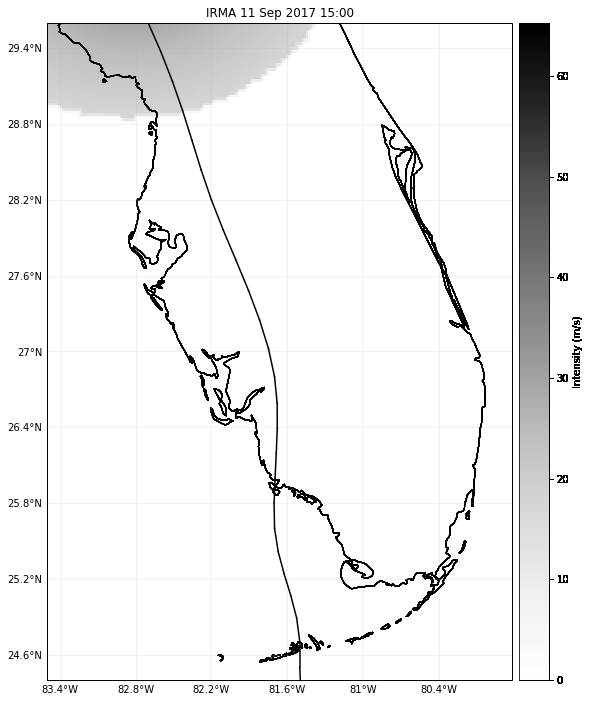

In [10]:
lon_min, lat_min, lon_max, lat_max = -83.5, 24.4, -79.8, 29.6
centr_video = Centroids()
centr_video.set_raster_from_pnt_bounds((lon_min, lat_min, lon_max, lat_max), 0.04)
centr_video.check()

track_name = '2017242N16333' # '2016273N13300' # '1992230N11325'
tc_video = TropCyclone()
# use file_name='' to not to write the video
tc_list, tr_coord = tc_video.video_intensity(track_name, tr_irma, centr_video, file_name='./results/irma_tc_fl.gif')
# tc_list contains a list with TropCyclone instances plotted at each time step
# tr_coord contains a list with the track path coordinates plotted at each time step

# mp4 occupies much less space! To use it:
# conda install ffmpeg
# in code:
# plt.rcParams['animation.ffmpeg_path']='path/to/climada_env/bin/ffmpeg'
# writer=animation.FFMpegWriter(bitrate=500)
# tc_list, tr_coord = tc_video.video_intensity(track_name, tr_irma, centr_video, file_name='./results/irma_tc_fl.gif', writer=writer)